In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from problems import Metric

In [3]:
def benchmark_pb(pb, is_drawable=False, show_sol=False):
    if is_drawable:
        pb.plot_fct()

    if is_drawable or show_sol:
        trials = pb.run_trials(n_iter=100, n_trials=1, eg_eta=1, ergodic=False)

    if is_drawable:
        pb.compare_trials_path(trials, title='non-ergodic')

    if show_sol:
        for algo, algo_trials in trials.items():
            p1, p2 = algo_trials[0][-1]
            print(f'''Solution {algo}:
                P1: {p1}
                P2: {p2}''')

    if is_drawable:
        trials = pb.run_trials(n_iter=100, n_trials=1, eg_eta=1, ergodic=True)
        pb.compare_trials_path(trials, title='ergodic')

    trials_no_ergo = pb.run_trials(n_iter=300, n_trials=20, eg_eta=1, ergodic=False)
    trials_ergo = pb.run_trials(n_iter=300, n_trials=20, eg_eta=1, ergodic=True)


    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    pb.plot_trials_convergence(trials_no_ergo, Metric.OPT_DIST, title='non-ergodic', ax=axs[0])
    pb.plot_trials_convergence(trials_ergo, Metric.OPT_DIST, title='ergodic', ax=axs[1], show_legend=True, show_metric_title=False)

    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    pb.plot_trials_convergence(trials_no_ergo, Metric.GRAD_NORM, title='non-ergodic', ax=axs[0])
    pb.plot_trials_convergence(trials_ergo, Metric.GRAD_NORM, title='ergodic', ax=axs[1], show_legend=True, show_metric_title=False)

# Bilinear

$$
\min_{\theta} \max_{\phi} (\theta - x_1^*) (\phi - x_2^*)
$$

trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:00<00:00, 31.28it/s]


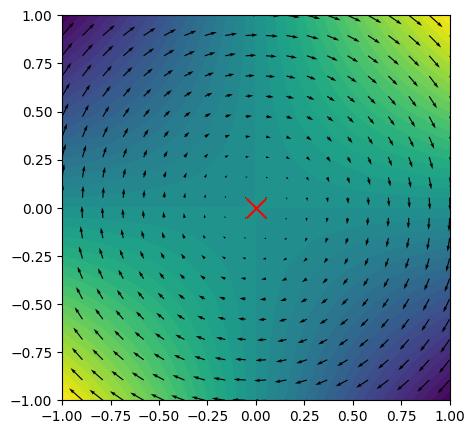

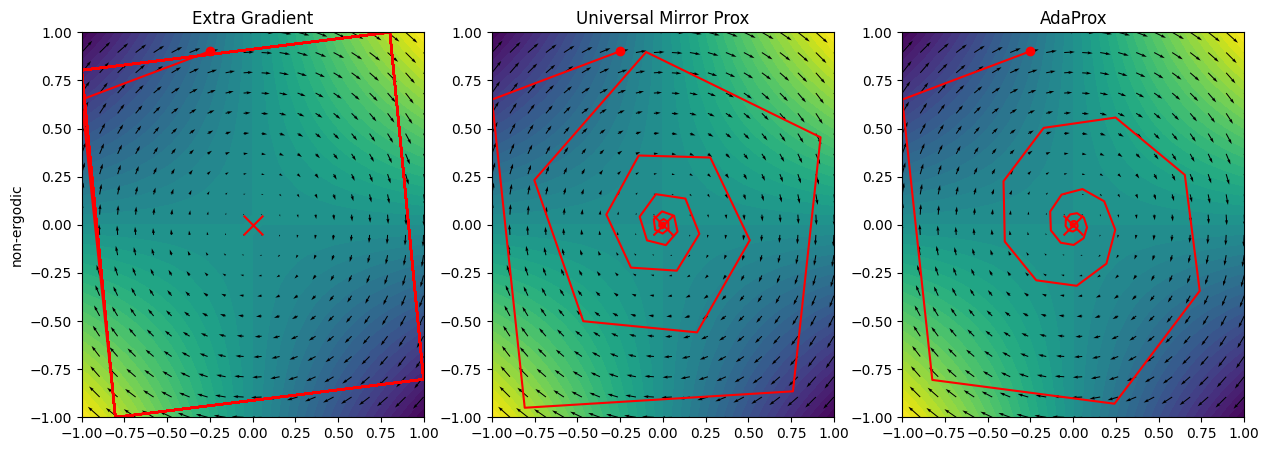

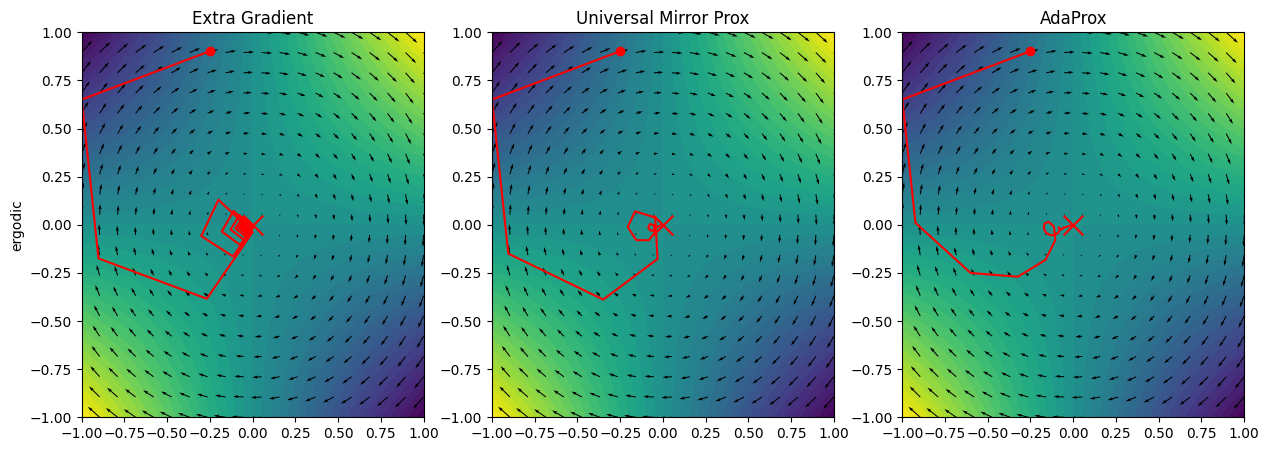

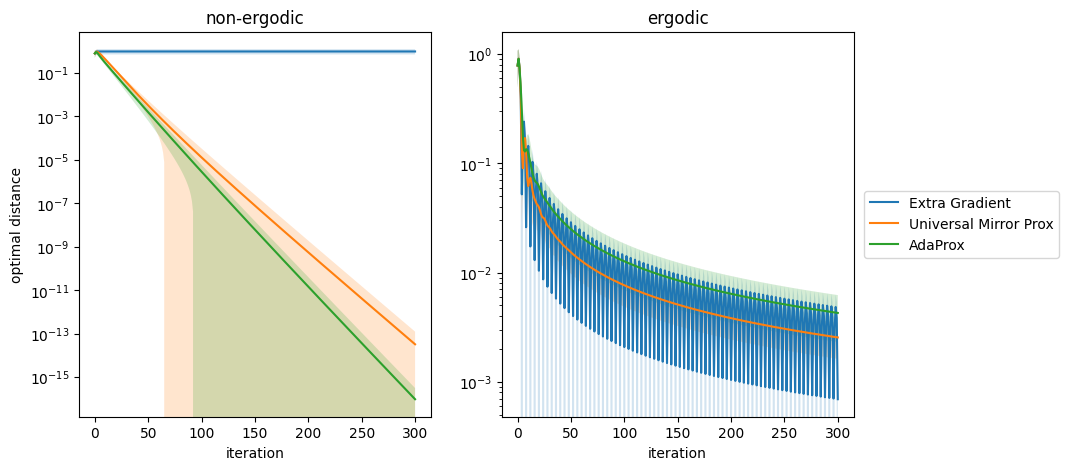

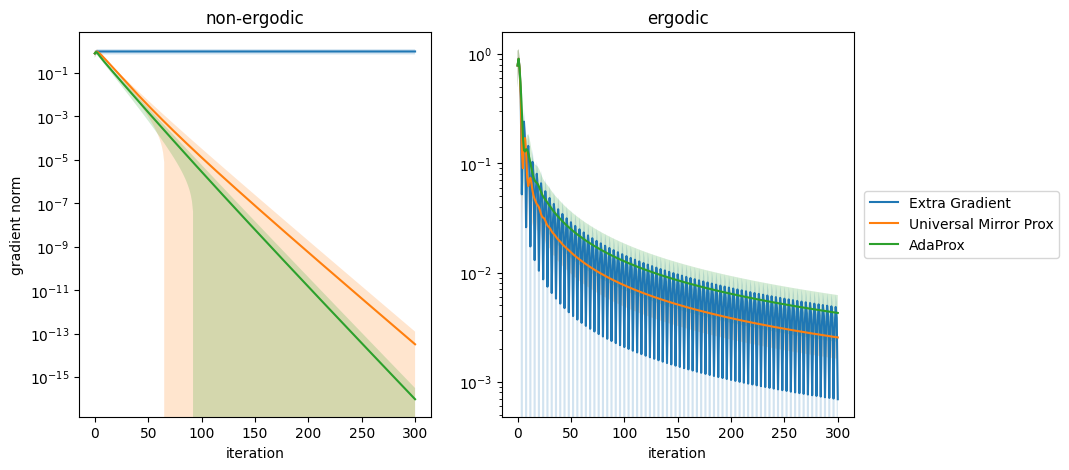

In [337]:
from problems import BilinearPb

pb = BilinearPb()
benchmark_pb(pb, is_drawable=True)

# Rock-Paper-Scissors

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 30.55it/s]


Solution Extra Gradient:
                P1: [0.69374764 0.30625236 0.        ]
                P2: [0.         0.         1.49215385]
Solution Universal Mirror Prox:
                P1: [0.33332238 0.3333425  0.33333512]
                P2: [0.33334506 0.33332358 0.33333136]
Solution AdaProx:
                P1: [0.33333476 0.33333206 0.33333318]
                P2: [0.33333208 0.33333436 0.33333356]


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:01<00:00, 15.46it/s]


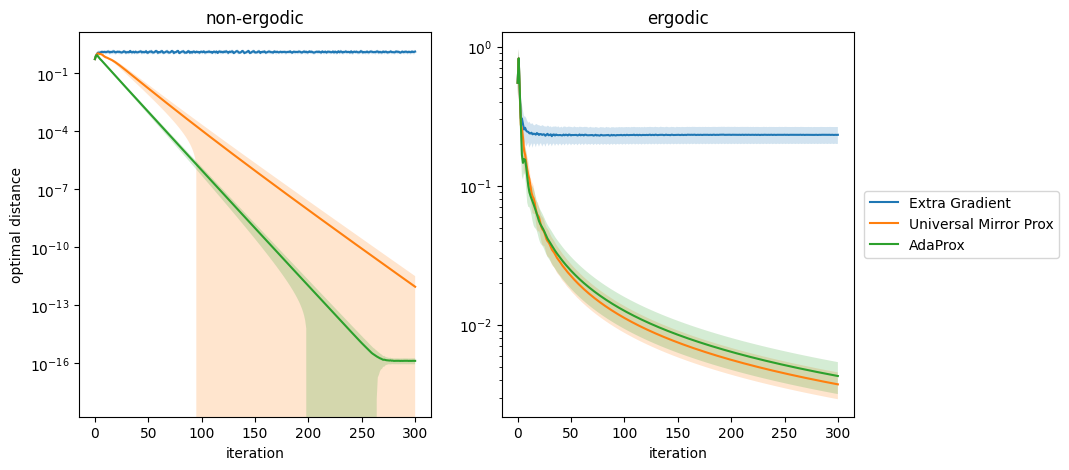

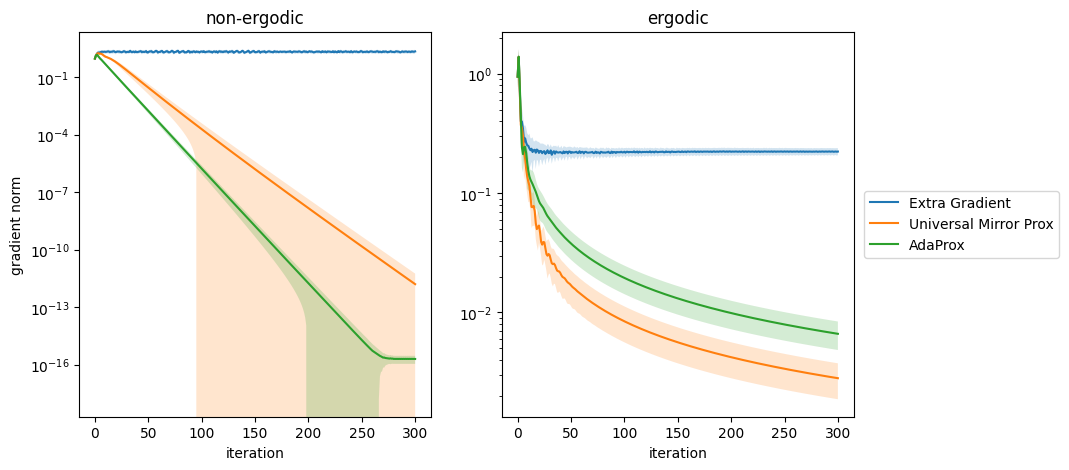

In [338]:
from problems import RockPaperScissorsPb

pb = RockPaperScissorsPb()
benchmark_pb(pb, show_sol=True)

# Battle of the sexes

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 49.73it/s]


Solution Extra Gradient:
                P1: 1.0
                P2: 0.0
Solution Universal Mirror Prox:
                P1: 1.0
                P2: 1.0
Solution AdaProx:
                P1: 1.0
                P2: 1.0


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:01<00:00, 17.33it/s]


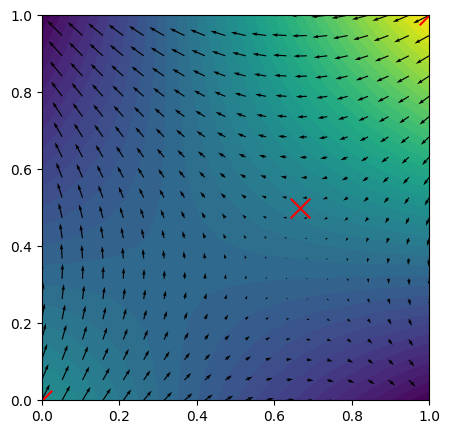

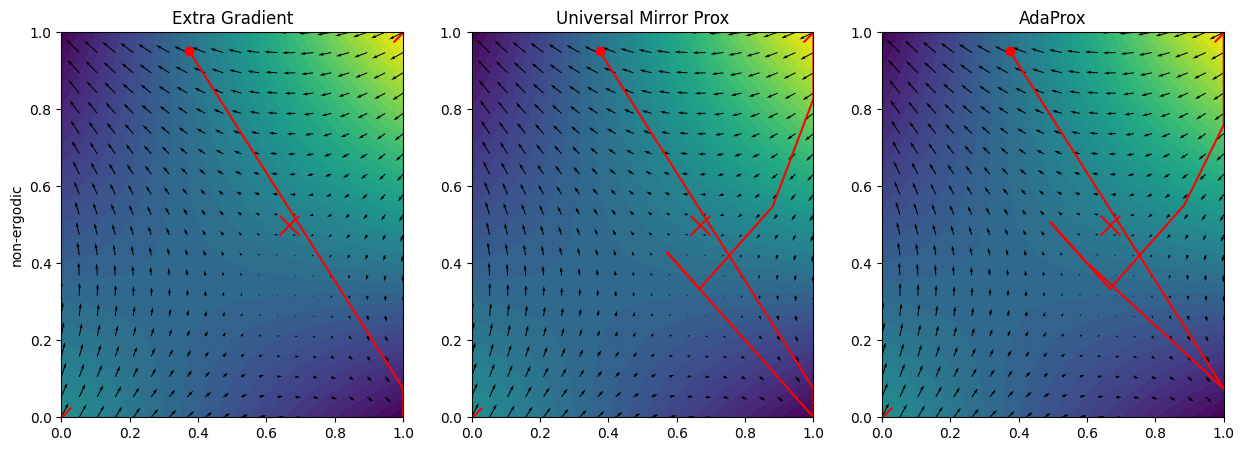

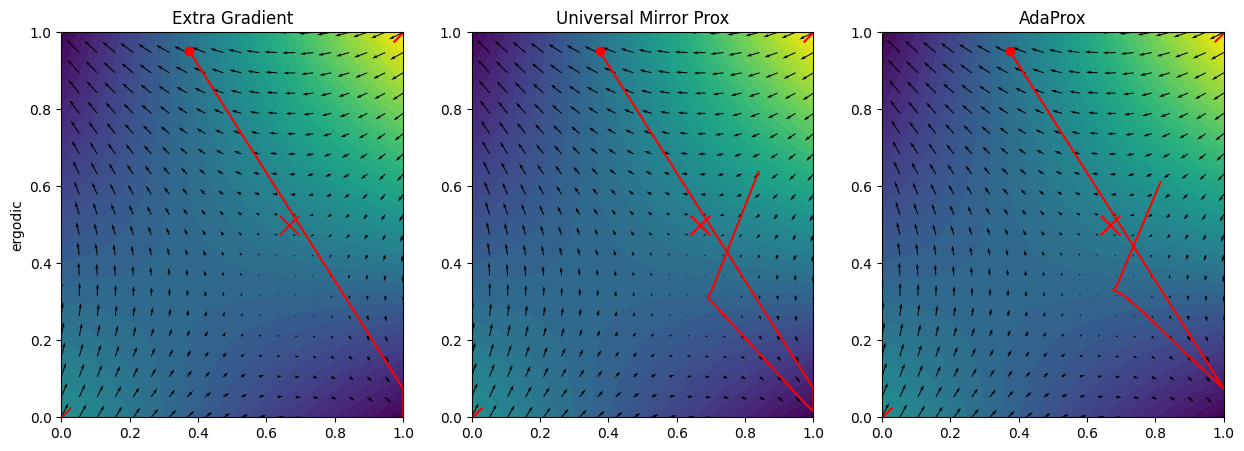

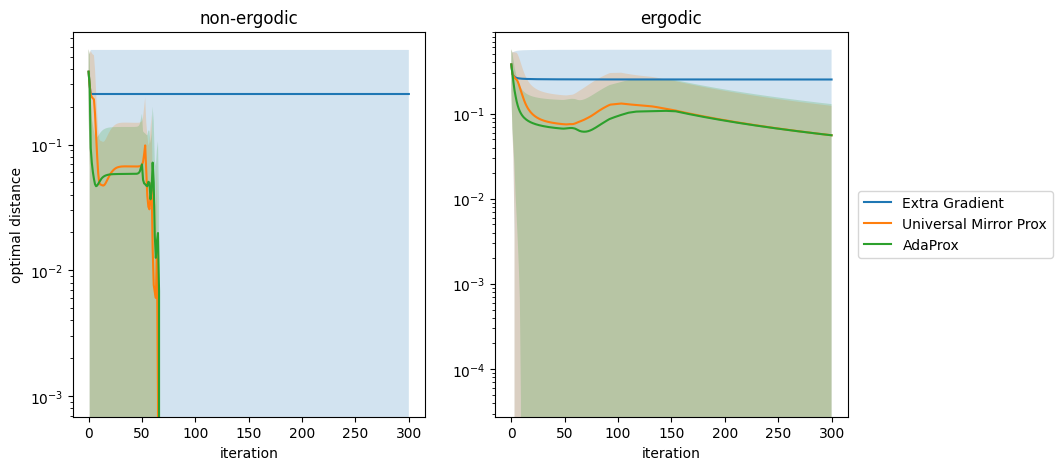

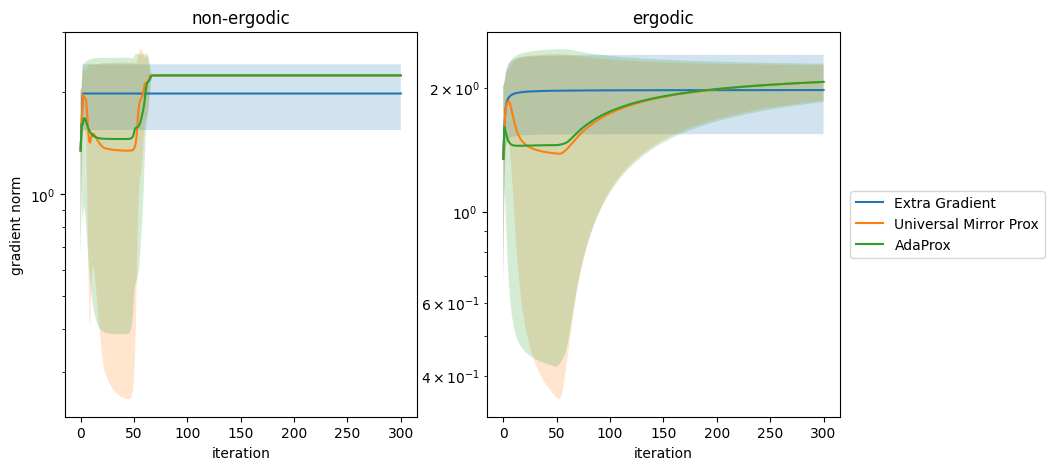

In [339]:
from problems import BattleOfTheSexesPb

pb = BattleOfTheSexesPb()
benchmark_pb(pb, is_drawable=True, show_sol=True)

# Prisoner's dilemma

trials ({'eg_eta': 1, 'ergodic': False}): 100%|██████████| 1/1 [00:00<00:00, 50.15it/s]


Solution Extra Gradient:
                P1: 1.0
                P2: 1.0
Solution Universal Mirror Prox:
                P1: 1.0
                P2: 1.0
Solution AdaProx:
                P1: 1.0
                P2: 1.0


trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:01<00:00, 16.76it/s]


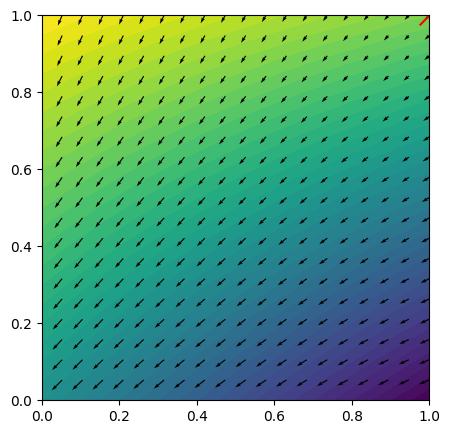

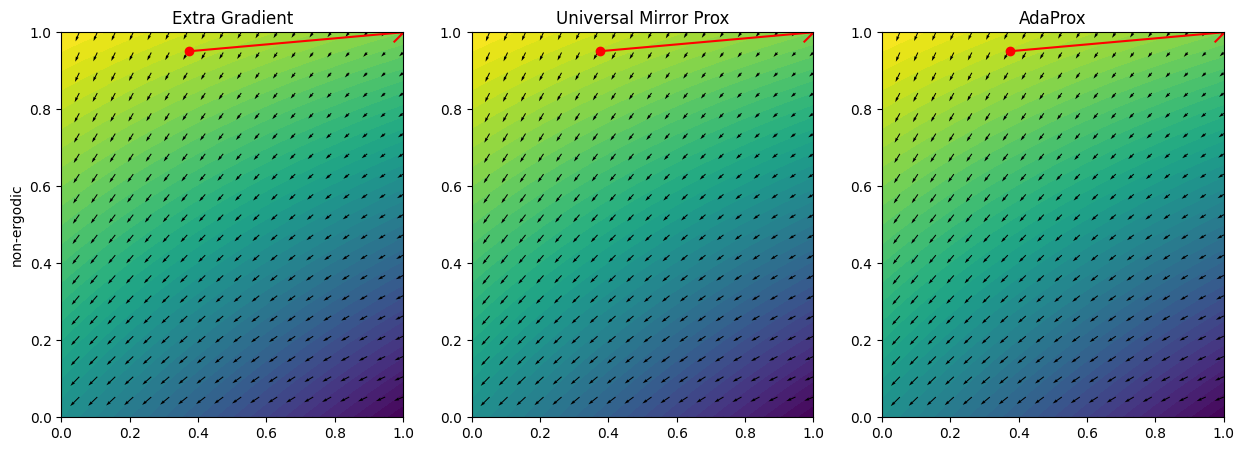

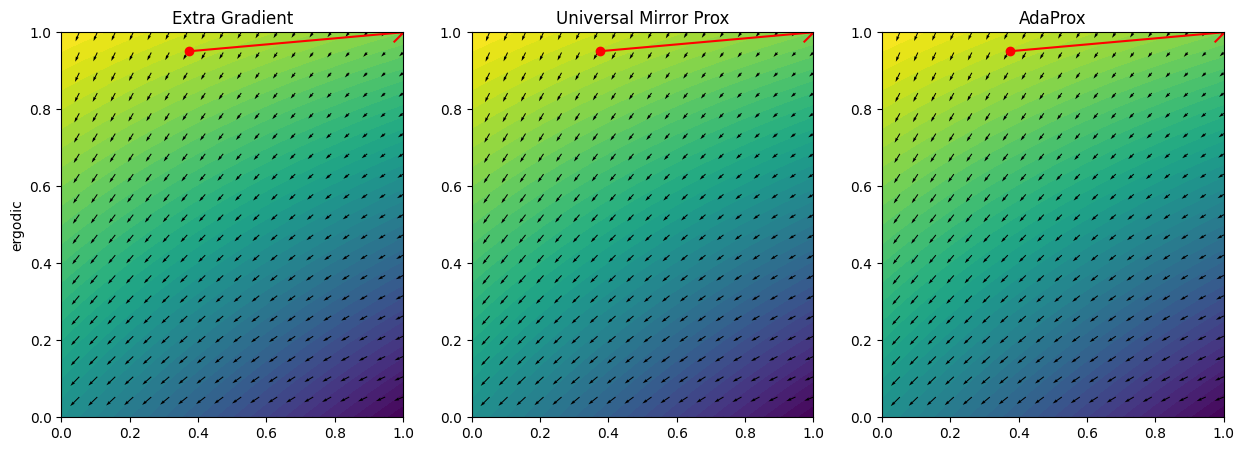

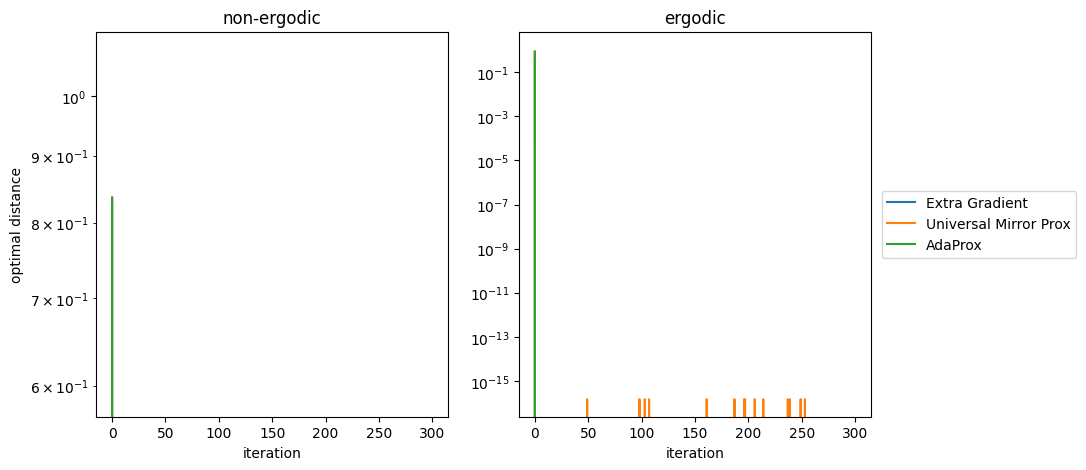

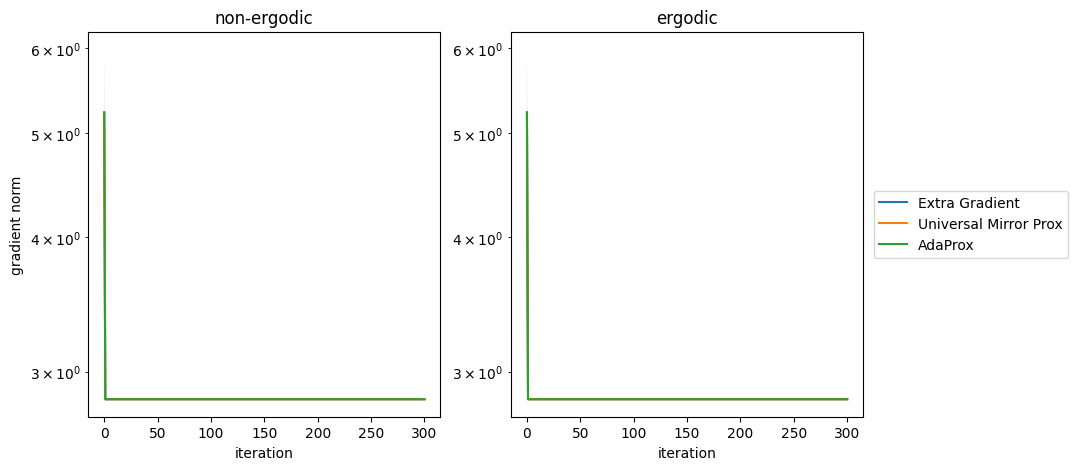

In [340]:
from problems import PrisonerDilemma

pb = PrisonerDilemma()
benchmark_pb(pb, is_drawable=True, show_sol=True)

# Paper bilinear 

trials ({'eg_eta': 1, 'ergodic': True}): 100%|██████████| 20/20 [00:00<00:00, 26.16it/s]


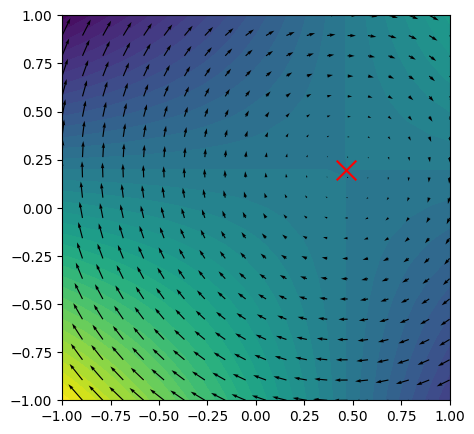

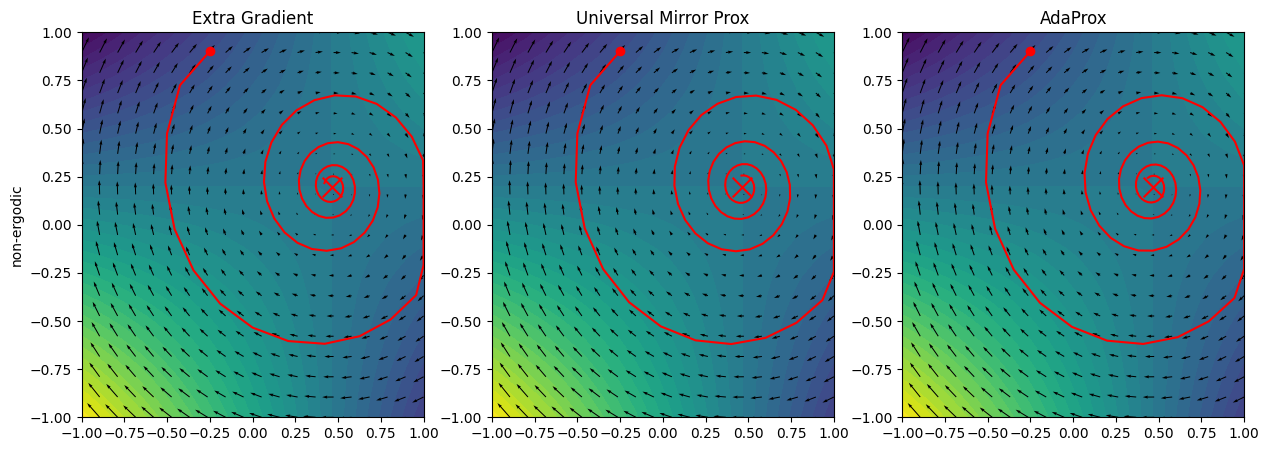

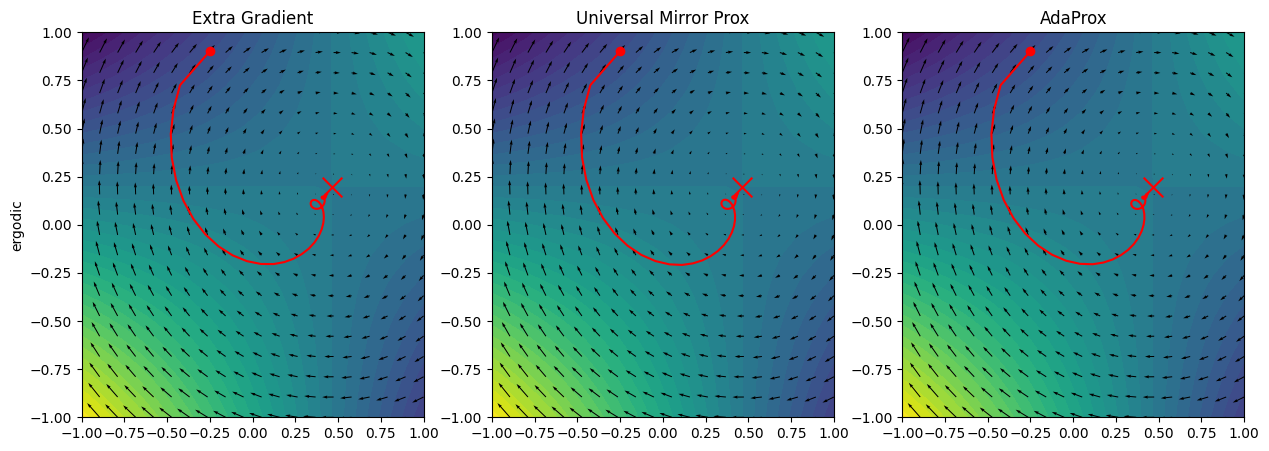

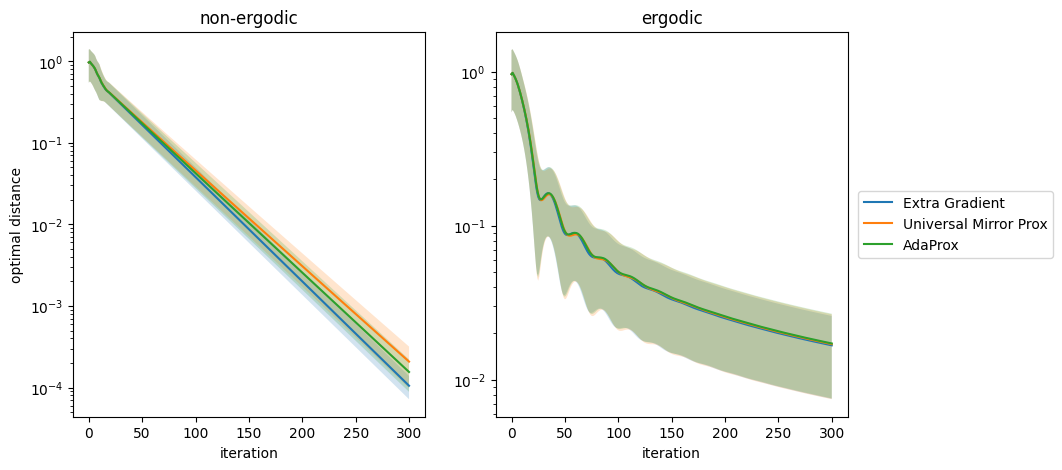

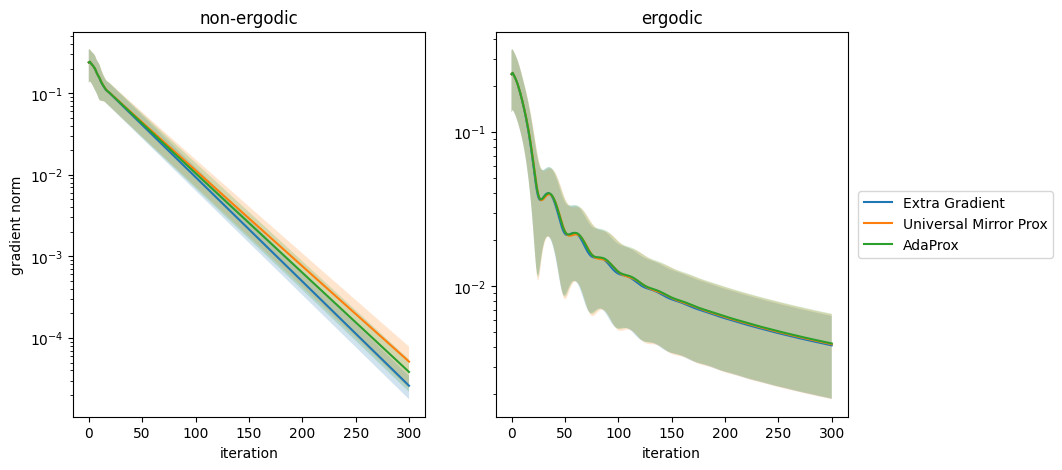

In [341]:
from problems import BilinearMinMax

pb = BilinearMinMax(dim=1, space=(-1, 1))
benchmark_pb(pb, is_drawable=True)

In [6]:
from problems import BilinearMinMax

pb = BilinearMinMax(dim=10, space=(-1, 1))
benchmark_pb(pb)

[[-0.16517799 -0.55578438 -0.76026927 -0.32476966  0.88581941 -0.35359414
   0.03758124  0.40603792 -0.2727408   0.94356417]
 [ 0.92489459 -0.49643541 -0.00550299 -0.39824338 -0.43031901 -0.92622611
   0.21912867  0.00535805 -0.8970425  -0.44270707]]
(-1, 1)


trials ({'eg_eta': 1, 'ergodic': False}):   0%|          | 0/20 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (2,) (10,) 